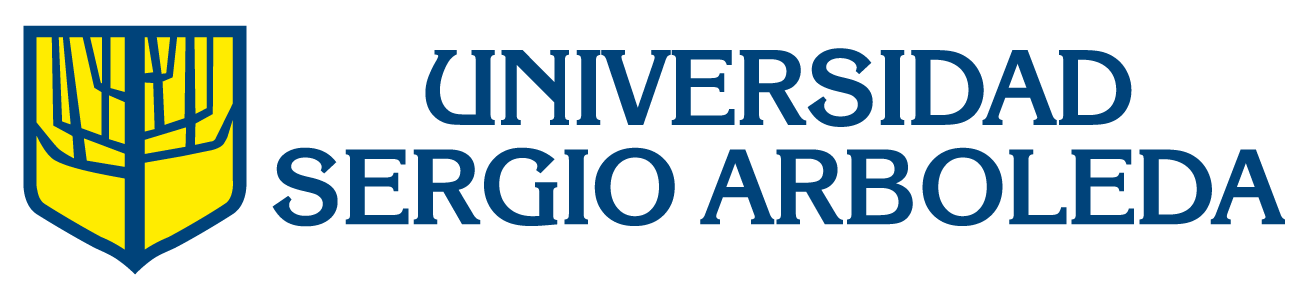


---




#**Proyecto Procesamiento Imágenes**

**Autores:**  

* Carlos Bermúdez
* Miguel Thomas


**Programa acádemico:**  

* Ciencias de la computación e Inteligencia Artificial

**Materia:**   
* Procesamiento de Imagenes

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import requests

# Carga de datos

In [ ]:
base_url = 'https://raw.githubusercontent.com/carlosbermudezgalvan/Datasets/main/imgs-mamografias'

image_files = [
    'mdb001.pgm', 'mdb005.pgm', 'mdb023.pgm', 'mdb028.pgm',
    'mdb081.pgm', 'mdb090.pgm', 'mdb115.pgm', 'mdb134.pgm',
    'mdb184.pgm', 'mdb314.pgm', 'info.txt'
]

for file_name in image_files:
    file_url = f'{base_url}/{file_name}'
    response = requests.get(file_url)
    with open(file_name, 'wb') as file:
        file.write(response.content)

archivos_descargados = os.listdir()
print("Archivos descargados:", archivos_descargados)

Archivos descargados: ['.config', 'mdb005.pgm', 'mdb023.pgm', 'mdb081.pgm', 'mdb028.pgm', 'mdb314.pgm', 'mdb090.pgm', 'mdb115.pgm', 'info.txt', 'mdb001.pgm', 'mdb184.pgm', 'mdb134.pgm', 'sample_data']


In [ ]:
direc = "/content/"
imgs = []
for archivo in os.listdir(direc):

    ruta_archivo = os.path.join(direc,archivo)

    img = cv2.imread(ruta_archivo, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        imgs.append(img)
    else:
        print(f'No se pudo cargar la imagen: {img}')

No se pudo cargar la imagen: None
No se pudo cargar la imagen: None
No se pudo cargar la imagen: None


In [ ]:
print("Cantidad images" ,len(imgs))

Cantidad images 10


In [ ]:
def mostrar_imagenes(imagenes, columnas=5, figsize=(10, 5)):
    """ Muestra una lista de imágenes en una cuadrícula.

    Args:
        imagenes (list): Lista de imágenes en formato de matriz de numpy.
        columnas (int): Número de columnas en la cuadrícula de visualización.
        figsize (tuple): Tamaño de la figura en pulgadas.
    """
    # Calcula el número de filas necesario para mostrar todas las imágenes
    filas = len(imagenes) // columnas + (len(imagenes) % columnas > 0)

    # Crea una figura con un tamaño especificado
    fig, axs = plt.subplots(filas, columnas, figsize=figsize)

    # Aplanar la lista de ejes si es necesario
    axs = axs.ravel() if len(imagenes) > 1 else [axs]

    # Mostrar cada imagen en un subgráfico
    for i, img in enumerate(imagenes):
        axs[i].imshow(img, cmap='gray')  # Asegúrate de que las imágenes están en escala de grises
        axs[i].axis('off')  # Oculta los ejes

    # Oculta cualquier gráfico extra si existen
    for ax in axs[len(imagenes):]:
        ax.axis('off')

    # Muestra la figura
    plt.tight_layout()
    plt.show()

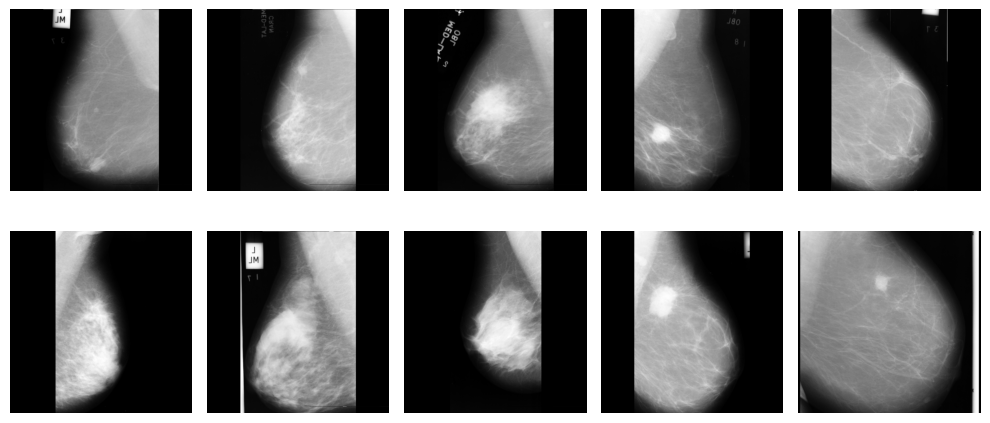

In [ ]:
imgs = np.array(imgs)
mostrar_imagenes(imgs, columnas=5, figsize=(10, 5))

In [ ]:
imgs.shape

(10, 1024, 1024)

In [ ]:
def resize_images(imagenes, new_width=224, new_height=224):
  resized_images = []
  for image in imagenes:
    # Convert the NumPy array to a PIL Image object
    image_pil = Image.fromarray(image)

    # Get the original dimensions
    original_width, original_height = image_pil.size

    # Calculate the aspect ratio
    ratio = original_width / original_height

    # Determine the new dimensions while maintaining aspect ratio
    if new_width / new_height < ratio:
      new_width = int(new_height * ratio)
    else:
      new_height = int(new_width / ratio)

    # Resize the image using PIL's resize method (alternative)
    resized_image = image_pil.resize((new_width, new_height), resample=Image.LANCZOS)  # Use LANCZOS for high-quality resampling

    # Convert the resized PIL Image back to a NumPy array
    resized_image_np = np.array(resized_image)

    # Append the resized image to the list
    resized_images.append(resized_image_np)

  return resized_images

imgs_resize = resize_images(imgs)


In [ ]:
imgs_resize = np.array(imgs_resize)

imgs_resize.shape

(10, 224, 224)

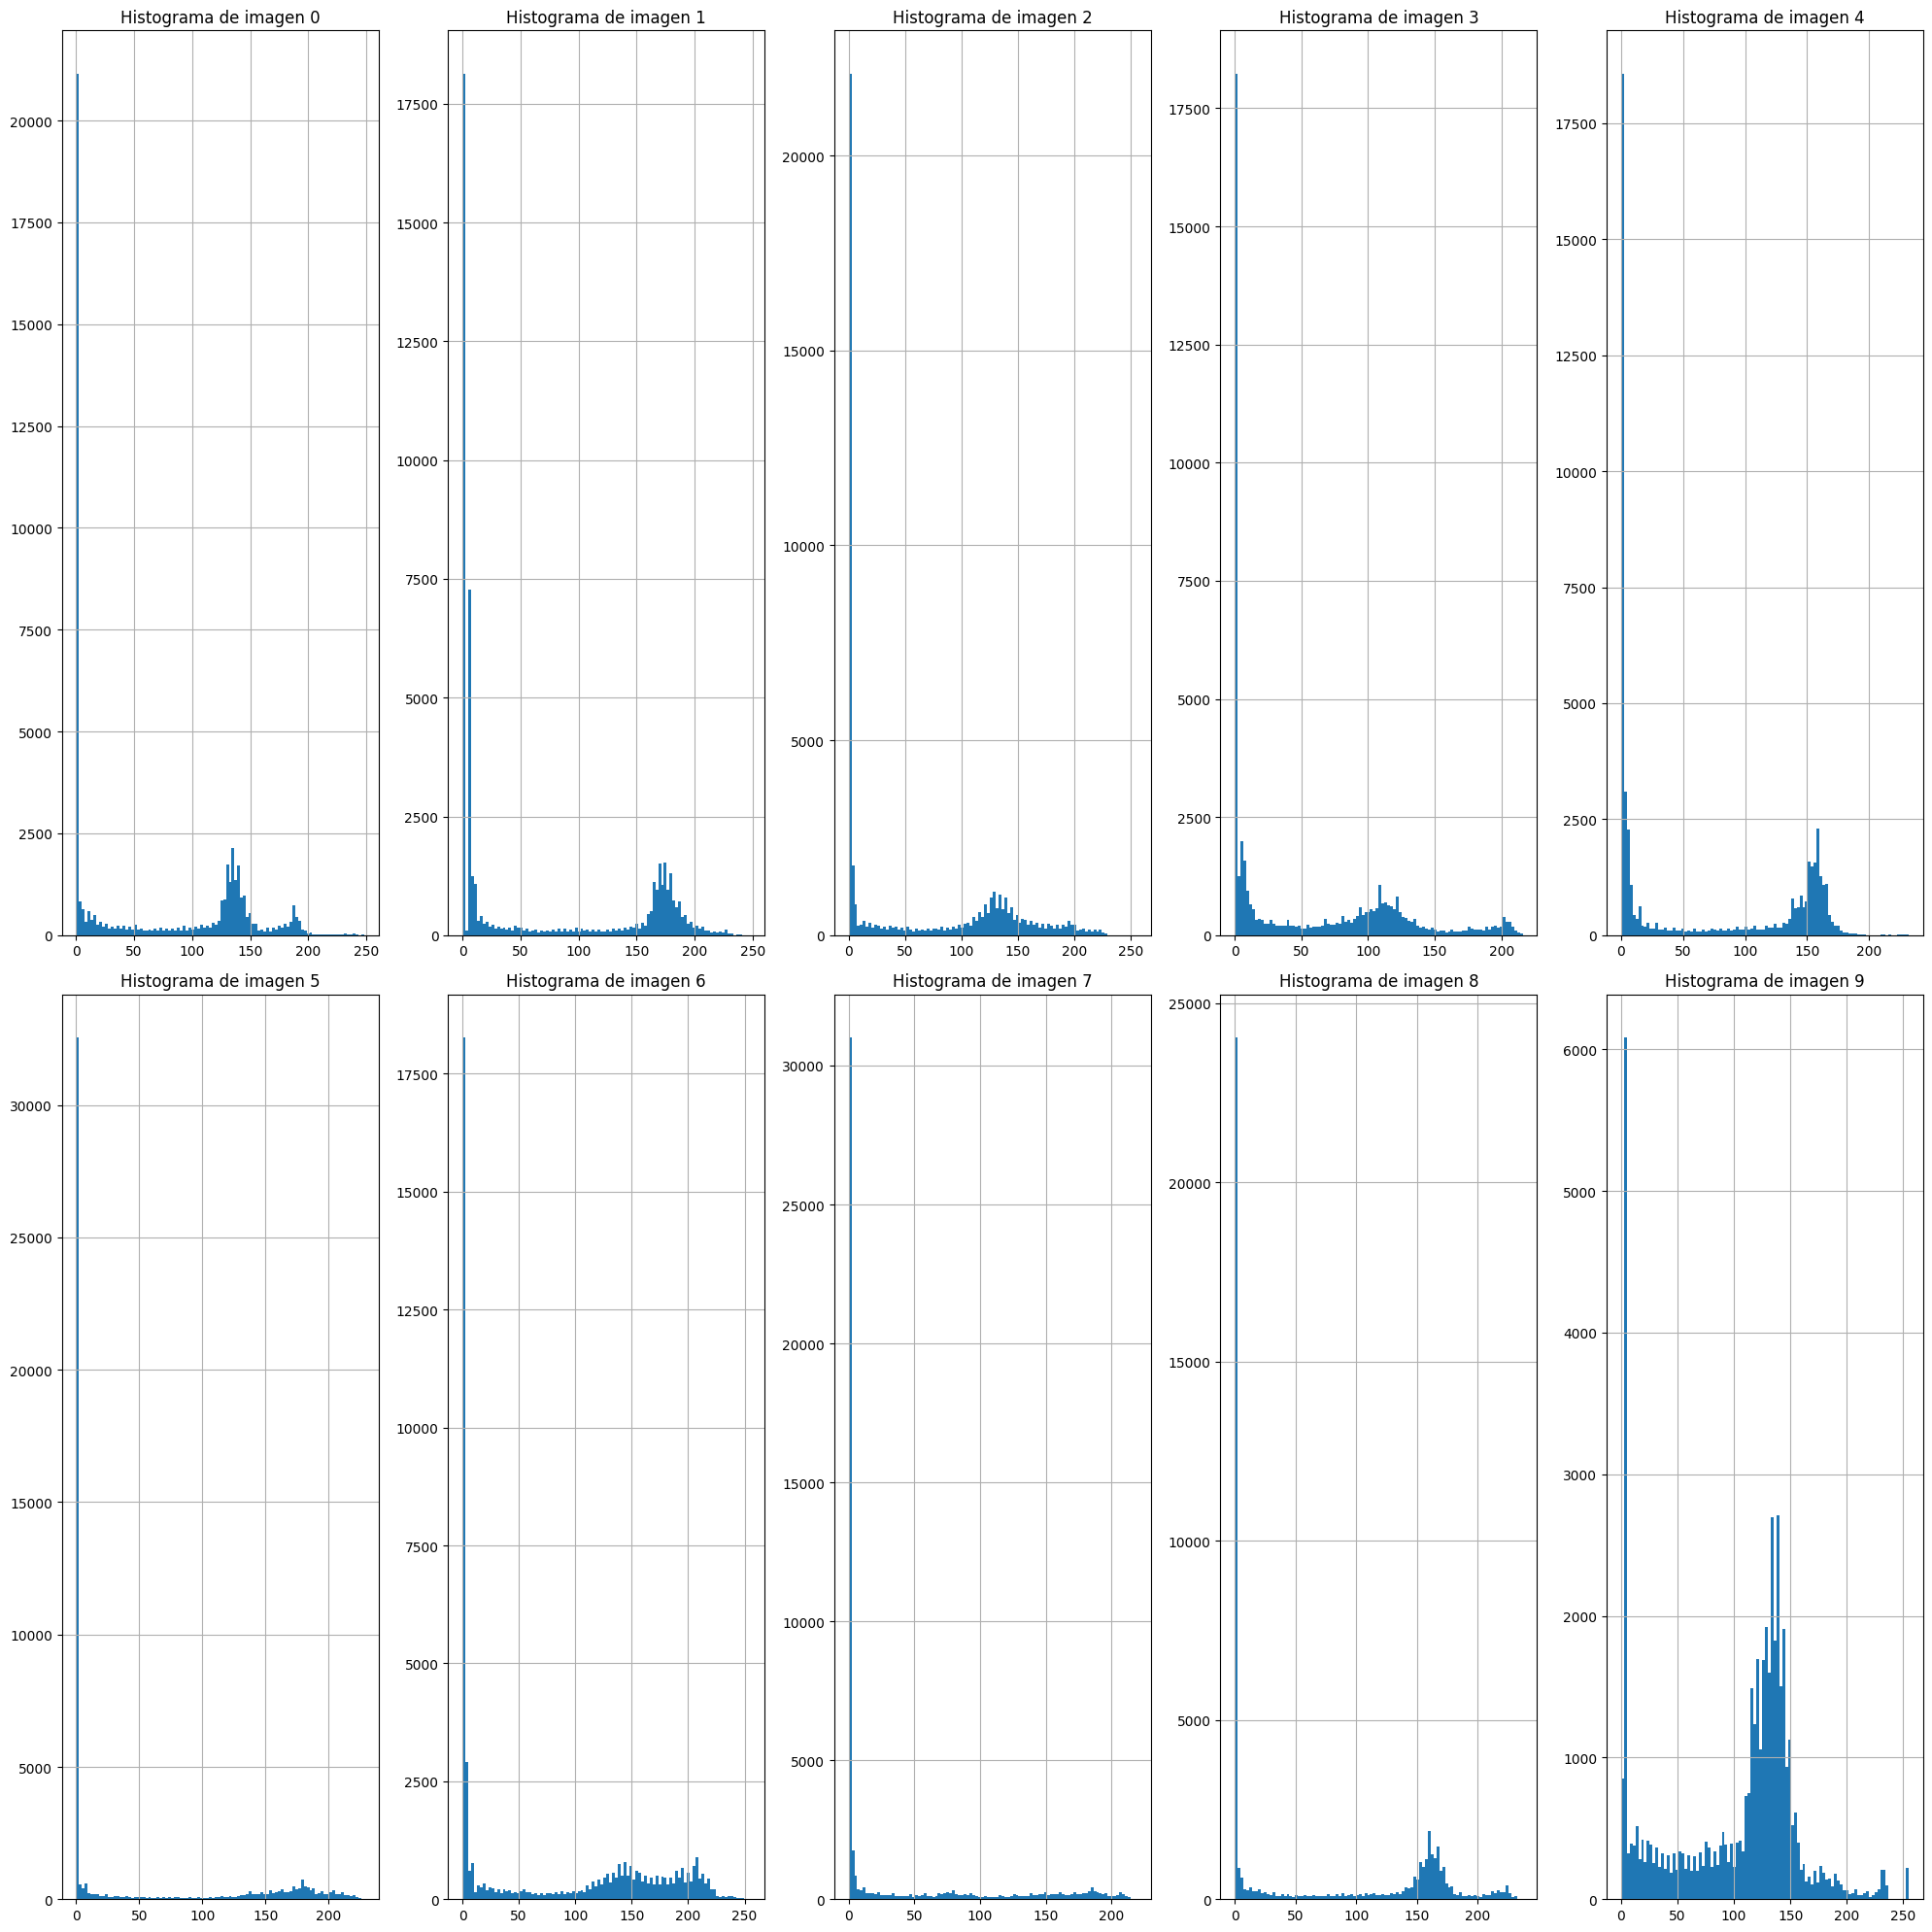

In [ ]:
def mostrar_histogramas_imagenes(imagenes, figsize=(20, 20)):
    """
    Muestra histogramas de cada imagen en una cuadrícula.

    Args:
        imagenes (list): Lista de imágenes en formato NumPy.
        figsize (tuple): Tamaño de la figura en pulgadas (ancho, alto).
    """
    columnas = 5
    filas = len(imagenes) // columnas + (len(imagenes) % columnas > 0)

    # Crea una figura y subfiguras con el tamaño especificado
    fig, axs = plt.subplots(filas,columnas, figsize=figsize)

    # Aplanar la lista de ejes si es necesario
    axs = axs.ravel() if len(imagenes) > 1 else [axs]

    # Recorrer cada imagen y mostrar su histograma
    for i, img in enumerate(imagenes):
        # Convertir la imagen a escala de grises si es necesario
        if len(img.shape) > 2:
            img = np.mean(img, axis=2)

        # Crear histograma y mostrarlo en el subgráfico
        axs[i].hist(img.ravel(), bins=100)
        axs[i].set_title(f"Histograma de imagen {i}")
        axs[i].grid(True)
        #axs[i].axis('off')


    # Ajustar el layout y mostrar la figura
    plt.tight_layout()
    plt.show()


mostrar_histogramas_imagenes(imgs_resize)

# Transformacion de intensidad

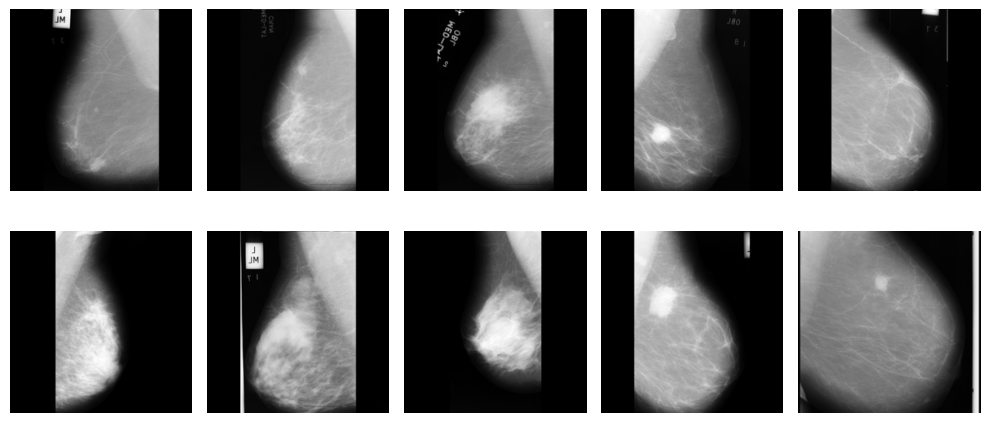

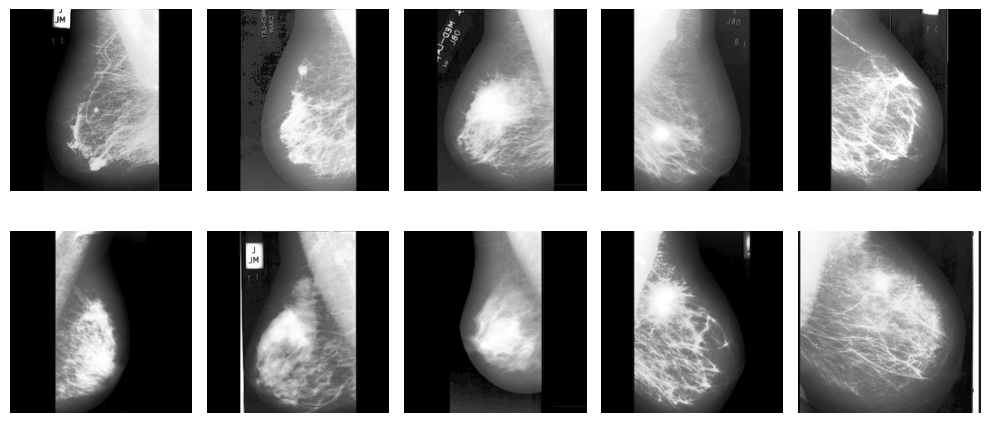

In [ ]:
def ecualizar_histogramas(imagenes):
    imagenes_ecualizadas = []
    for img in imagenes:
        # Ecualiza el histograma de la imagen
        img_ecualizada = cv2.equalizeHist(img)
        imagenes_ecualizadas.append(img_ecualizada)
    return imagenes_ecualizadas

imagenes_ecualizadas = ecualizar_histogramas(imgs_resize)
mostrar_imagenes(imgs_resize)
mostrar_imagenes(imagenes_ecualizadas)

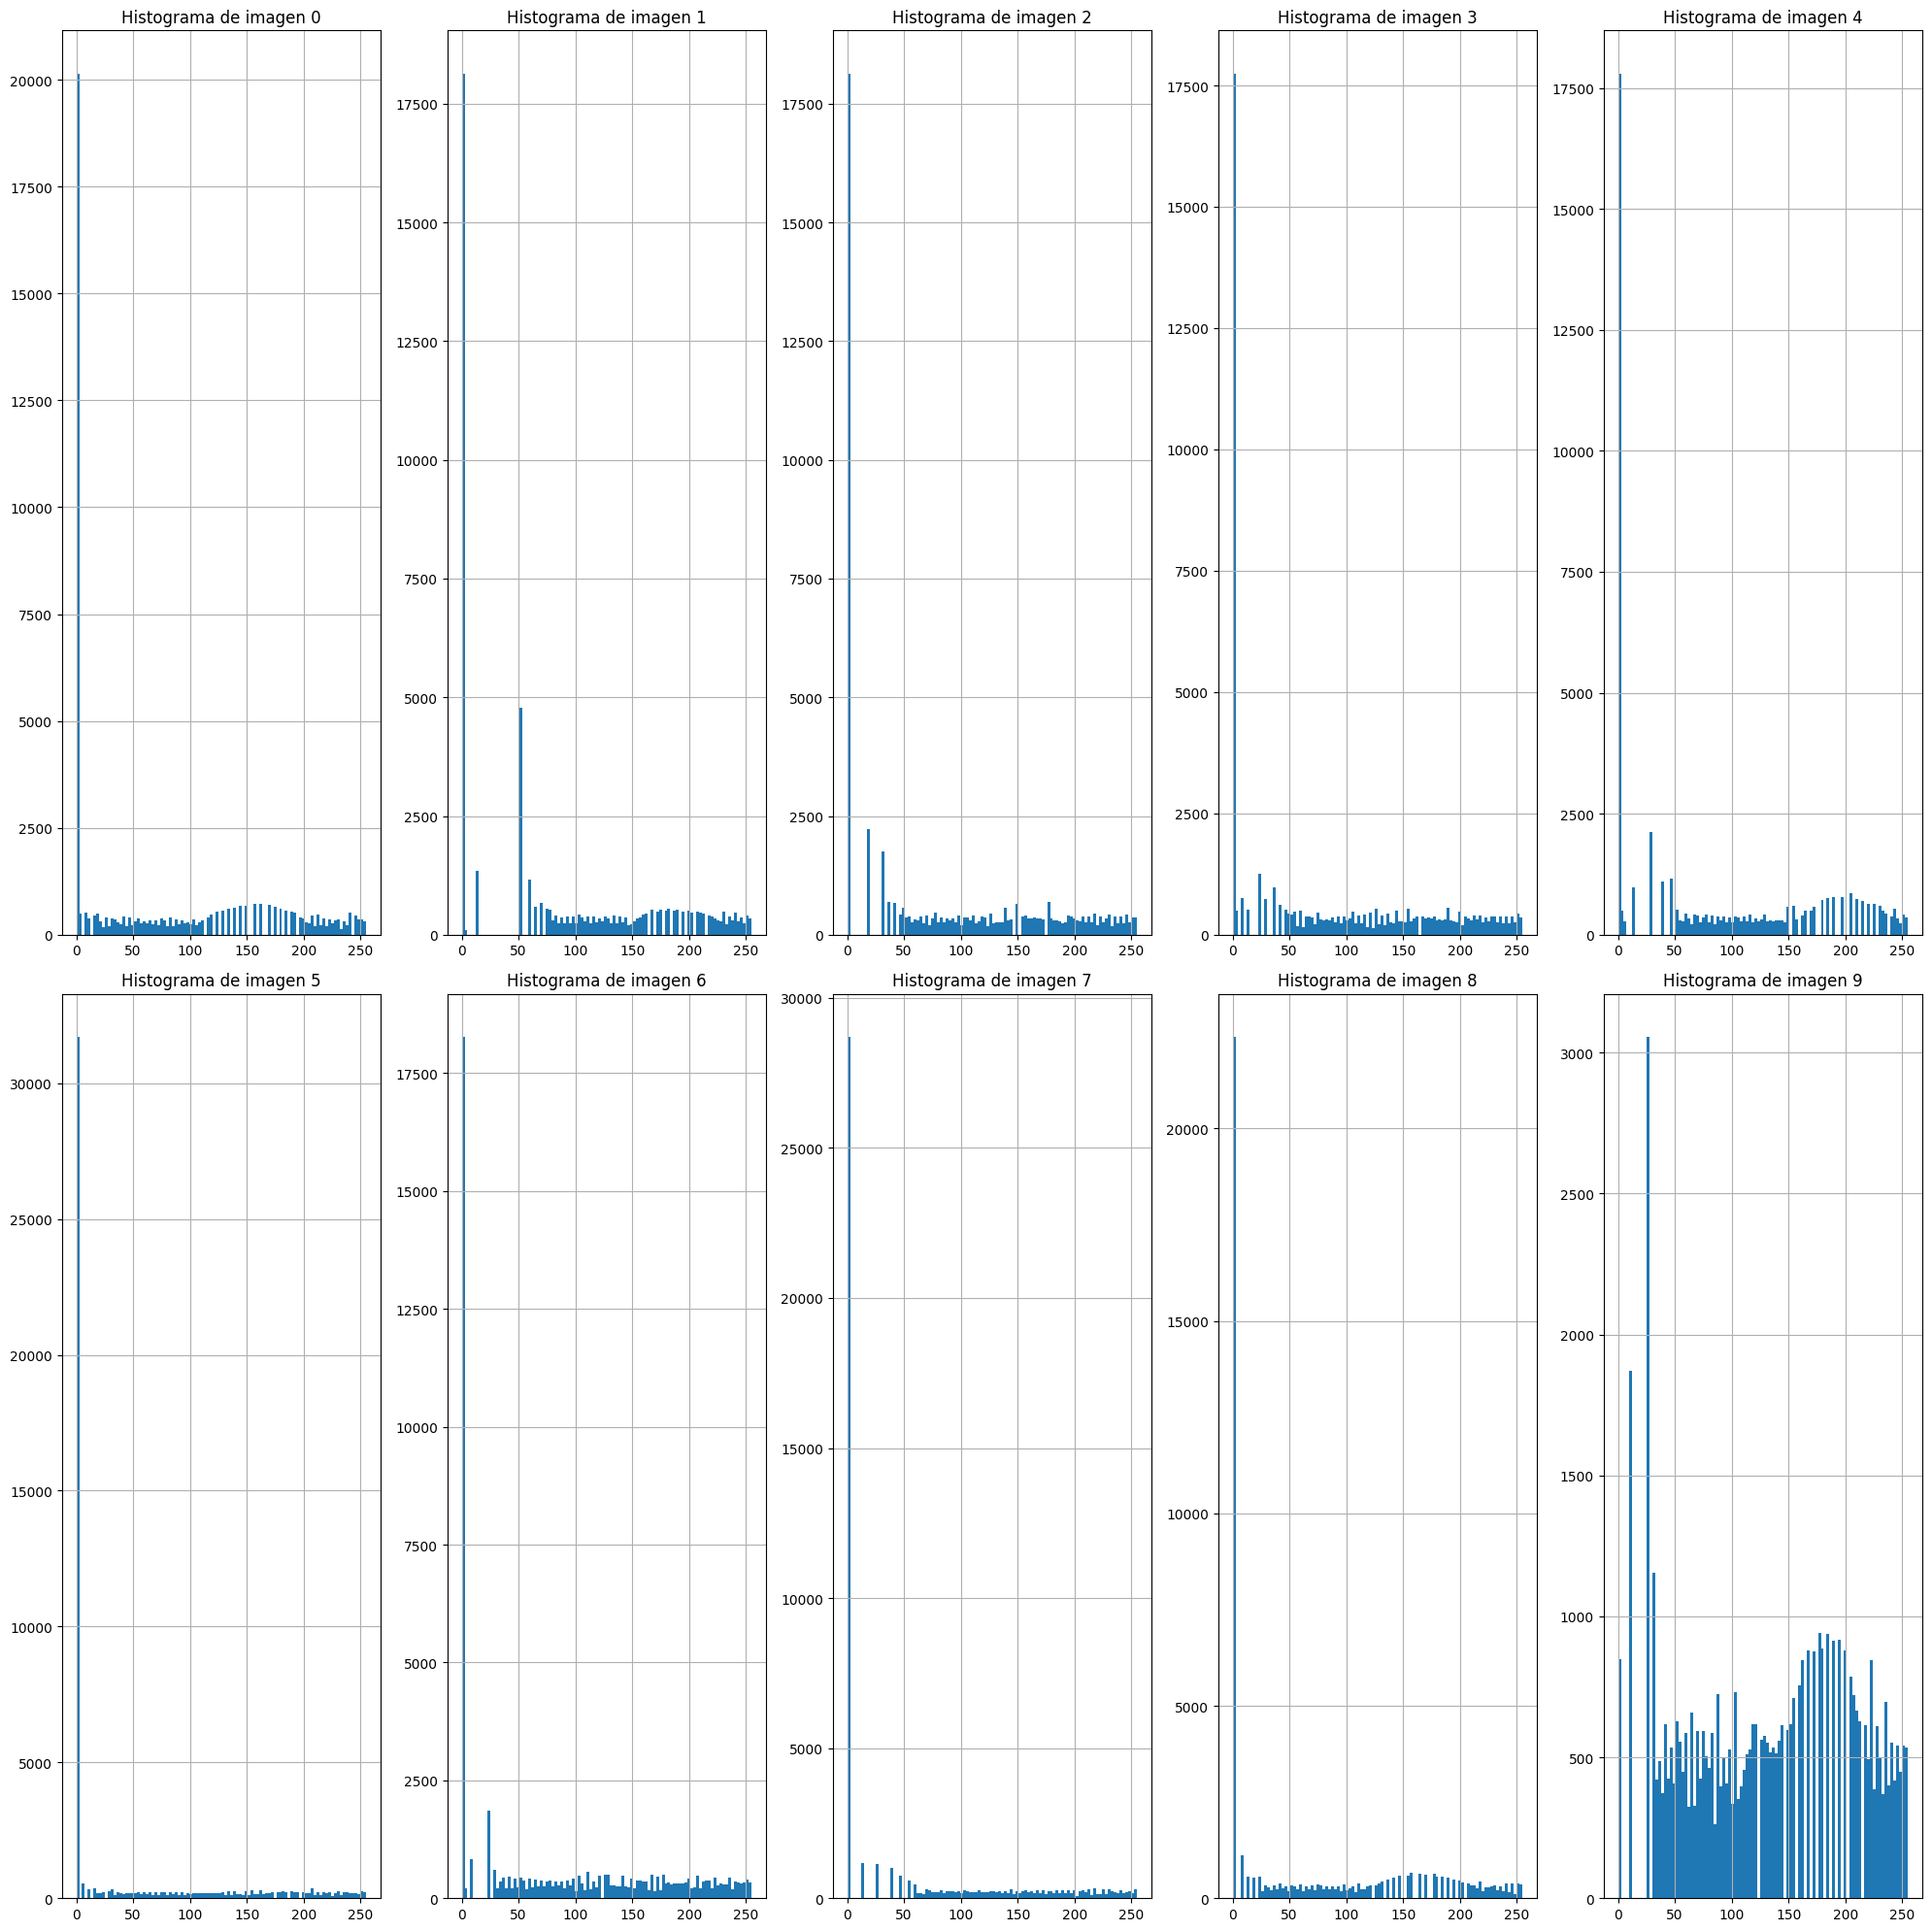

In [ ]:



mostrar_histogramas_imagenes(imagenes_ecualizadas)

# Filtro Gaussiano

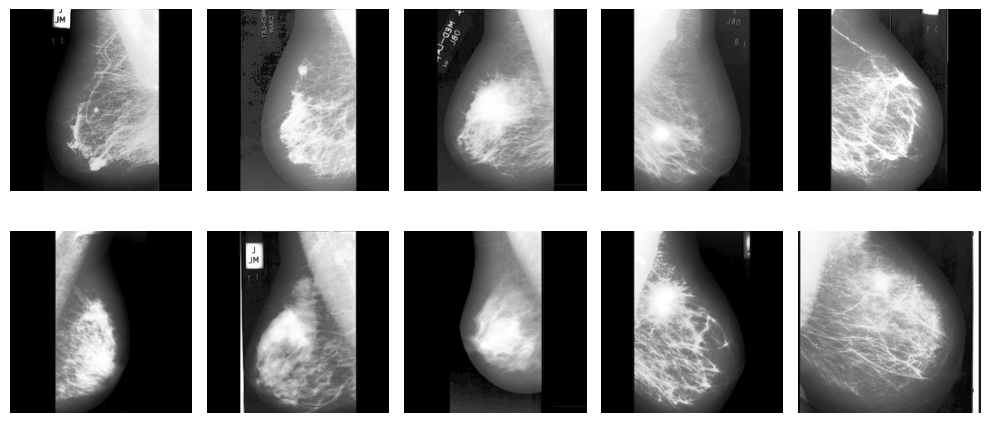

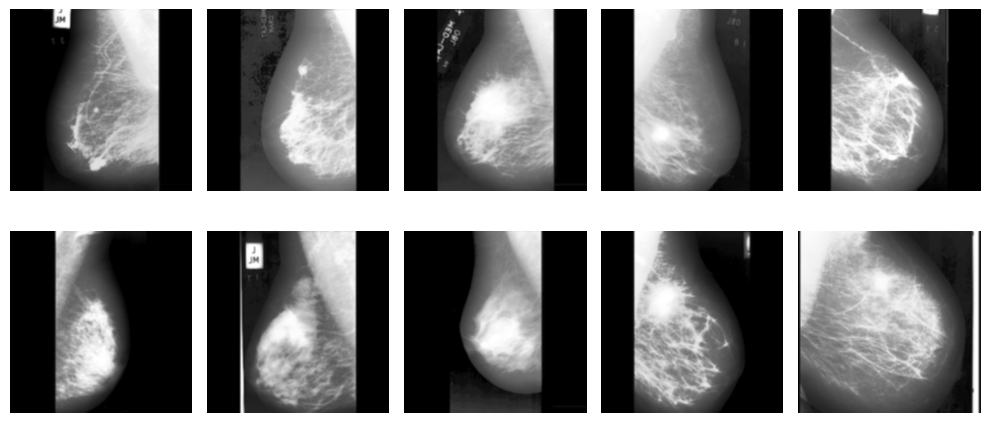

In [ ]:
def aplicar_filtro_gaussiano(imagenes, tamano_kernel=(3, 3), sigma=1):
    imagenes_filtradas = []
    for img in imagenes:
        img_filtrada = cv2.GaussianBlur(img, tamano_kernel, sigma)
        imagenes_filtradas.append(img_filtrada)
    return imagenes_filtradas

imgs_gaus = aplicar_filtro_gaussiano(imagenes_ecualizadas)
mostrar_imagenes(imagenes_ecualizadas)
mostrar_imagenes(imgs_gaus)

# Filtro Mediana

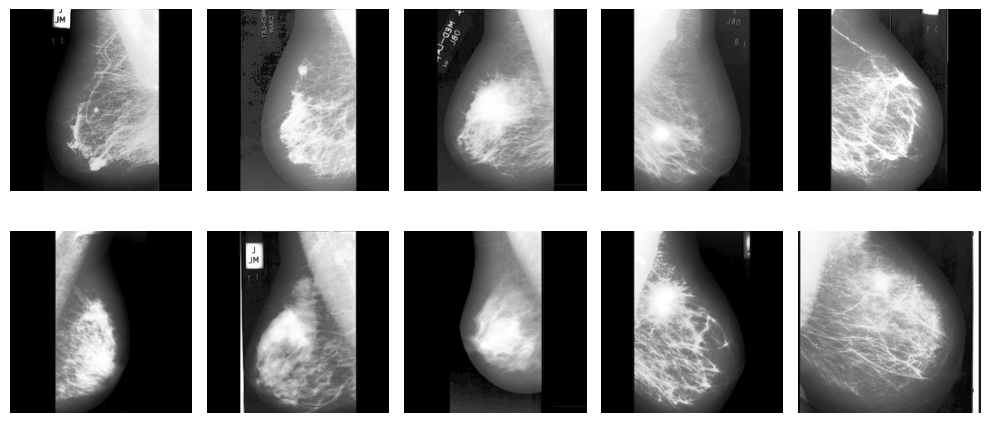

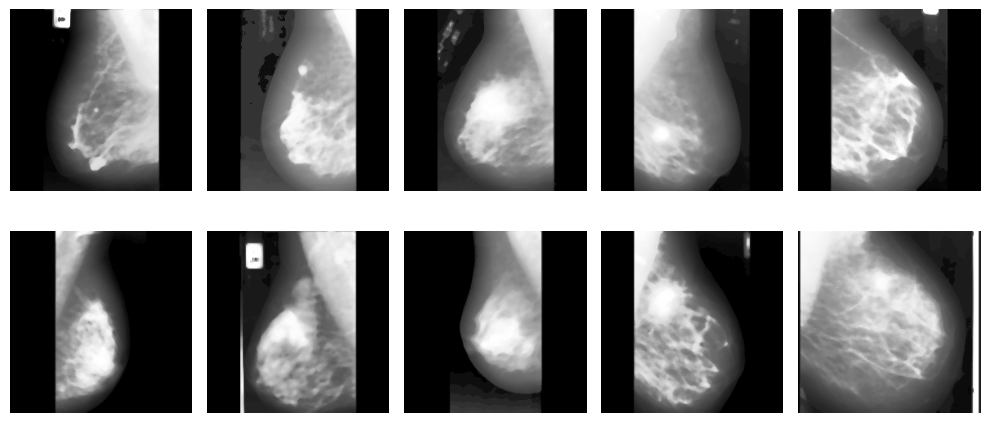

In [ ]:
def aplicar_filtro_mediana(imagenes, tamano_kernel=5):
    imagenes_filtradas = []
    for img in imagenes:
        img_filtrada = cv2.medianBlur(img, tamano_kernel)
        imagenes_filtradas.append(img_filtrada)
    return imagenes_filtradas

imgs_median = aplicar_filtro_mediana(imagenes_ecualizadas)
mostrar_imagenes(imagenes_ecualizadas)
mostrar_imagenes(imgs_median)

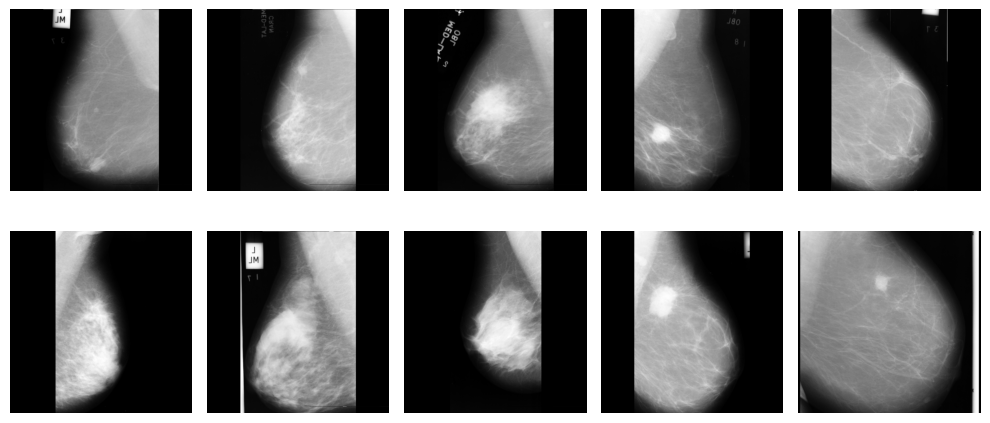

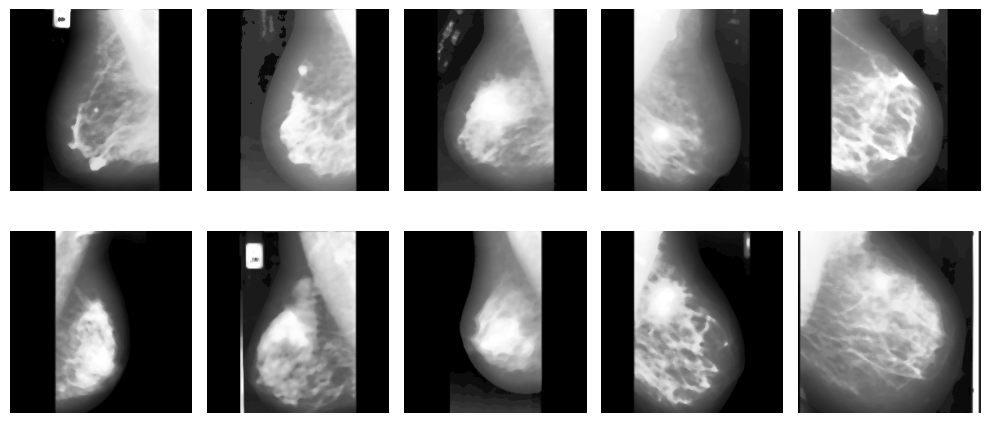

In [ ]:
imgs_median = ecualizar_histogramas(imgs_median)
mostrar_imagenes(imgs)
mostrar_imagenes(imgs_median)

# Umbralización

In [ ]:
def aplicar_umbralizacion(imagenes):
    umbrales = []
    for img in imagenes:
        # Conversión a escala de grises si la imagen no lo está
        if len(img.shape) > 2:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            img_gray = img

        # Umbralización global
        _, thresh_global = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

        # Umbralización adaptativa
        thresh_adaptativa = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                  cv2.THRESH_BINARY, 11, 2)

        # Método de Otsu
        _, thresh_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        umbrales.append((thresh_global, thresh_adaptativa, thresh_otsu))

    return umbrales

imgs_umbral = aplicar_umbralizacion(imgs_resize)

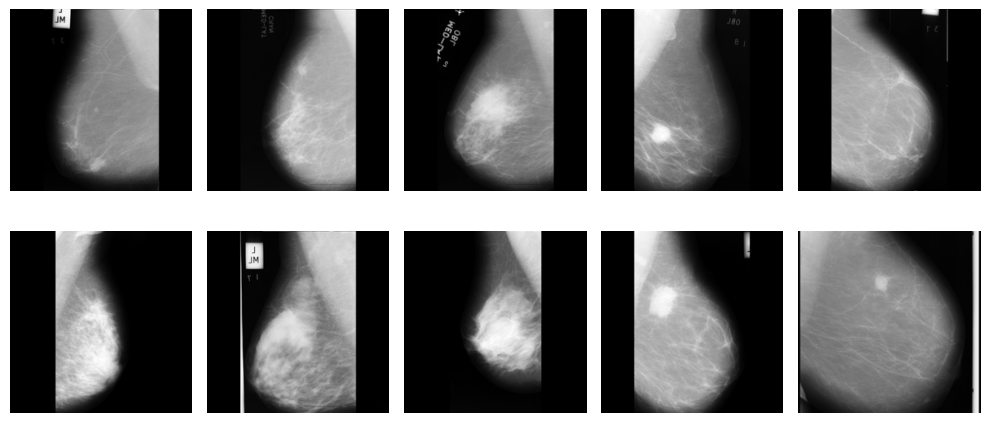

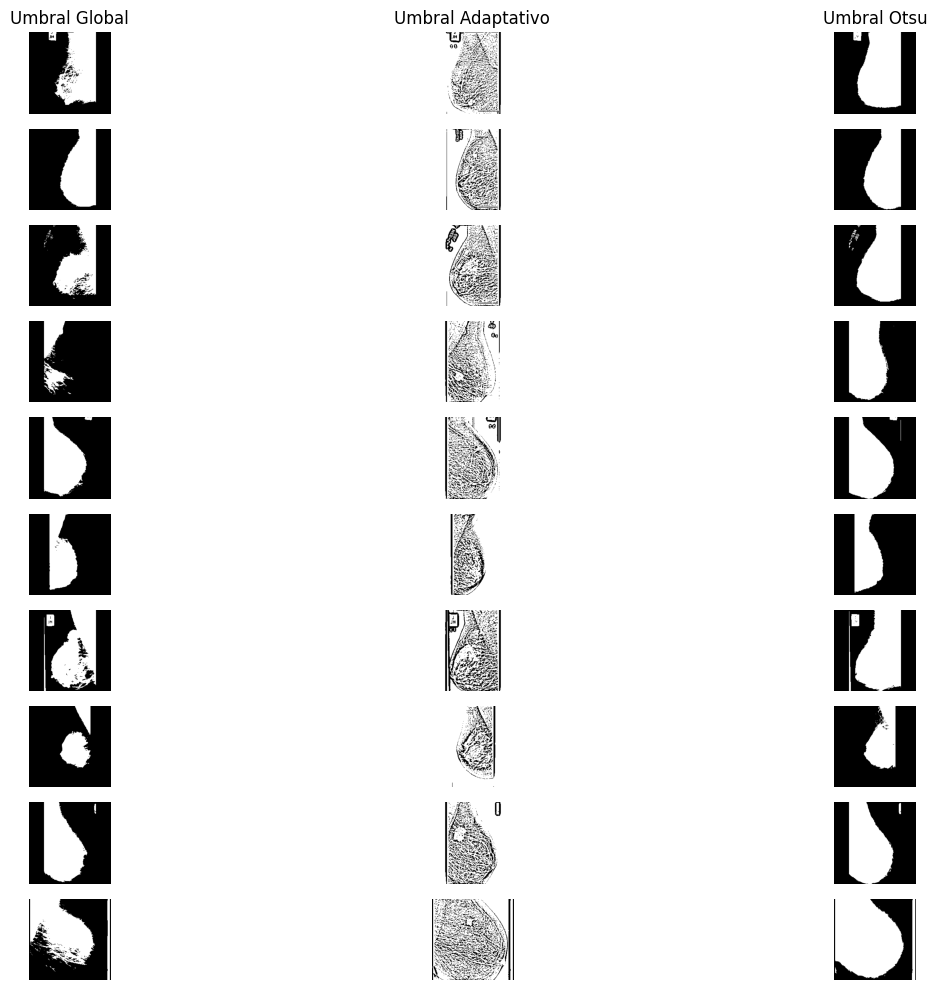

In [ ]:
def mostrar_umbralizaciones(umbrales):
    plt.figure(figsize=(15, 10))
    titles = ['Umbral Global', 'Umbral Adaptativo', 'Umbral Otsu']
    for idx, trio in enumerate(umbrales):
        for i, img in enumerate(trio):
            plt.subplot(len(umbrales), 3, idx * 3 + i + 1)
            plt.imshow(img, cmap='gray')
            if idx == 0:
                plt.title(titles[i])
            plt.axis('off')
    plt.tight_layout()
    plt.show()

mostrar_imagenes(imgs_resize)
mostrar_umbralizaciones(imgs_umbral)

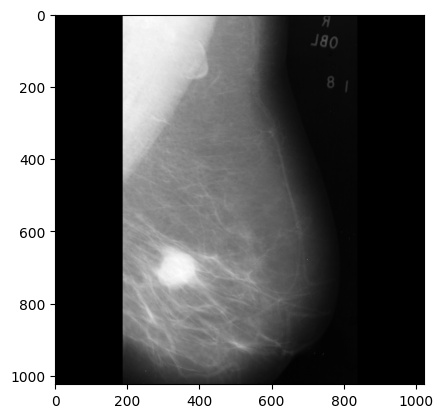

In [ ]:
plt.imshow(imgs[3], cmap='gray')

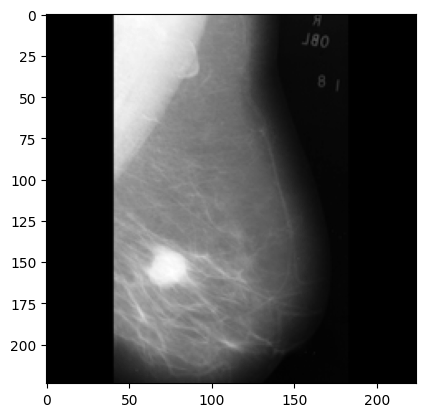

In [ ]:
plt.imshow(imgs_resize[3], cmap='gray')

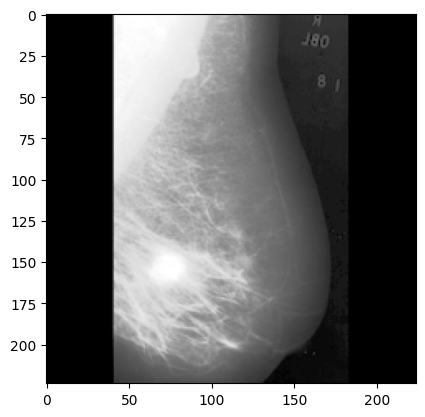

In [ ]:
plt.imshow(imagenes_ecualizadas[3], cmap='gray')

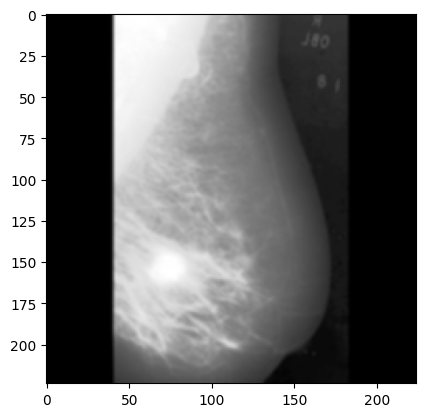

In [ ]:
plt.imshow(imgs_gaus[3], cmap='gray')

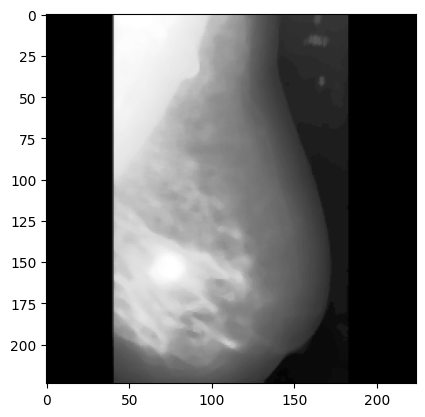

In [ ]:
plt.imshow(imgs_median[3], cmap='gray')

TypeError: Invalid shape (3, 224, 224) for image data

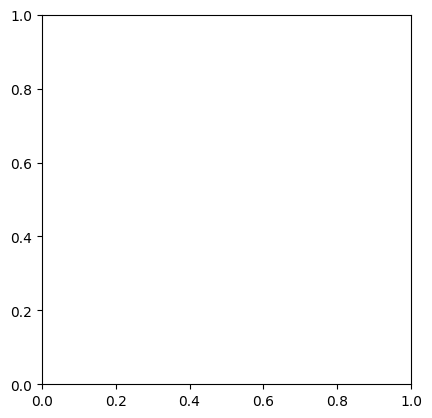

In [ ]:
plt.imshow(imgs_umbral[3], cmap='gray')